In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/abhishek/BE Sem1/LP3/ML/41357_Assignment_No_3/Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df = df.drop({'RowNumber','CustomerId','Surname'},axis='columns')
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

df.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [16]:
df.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [11]:
xdf = df.drop('Exited',axis='columns')
ydf = df['Exited']

In [31]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(xdf,ydf,test_size=0.3)

In [32]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [33]:
xtrain = stdsc.fit_transform(xtrain)


In [34]:
xtest = stdsc.transform(xtest)

In [17]:
import tensorflow as tf
from tensorflow import keras

In [35]:
xtrain.shape

(7000, 10)

In [37]:
ytest.shape

(3000,)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape = (10,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(xtrain,ytrain, epochs = 50)


Epoch 1/50
219/219 [==============================] - 1s 4ms/step - loss: 0.5052 - accuracy: 0.7950
Epoch 2/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4442 - accuracy: 0.8010
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4292 - accuracy: 0.8096
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4219 - accuracy: 0.8183
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4157 - accuracy: 0.8266
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4088 - accuracy: 0.8291
Epoch 7/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4015 - accuracy: 0.8333
Epoch 8/50
219/219 [==============================] - 1s 4ms/step - loss: 0.3948 - accuracy: 0.8354
Epoch 9/50
219/219 [==============================] - 1s 4ms/step - loss: 0.3877 - accuracy: 0.8379
Epoch 10/50
219/219 [==============================] - 1s 4ms/step - loss: 0.3821 - accuracy: 0.8407

In [38]:
model.evaluate(xtest,ytest)

94/94 [==============================] - 0s 932us/step - loss: 0.3451 - accuracy: 0.8583


[0.3450681269168854, 0.8583333492279053]

In [40]:
yp = model.predict(xtest)

94/94 [==============================] - 0s 3ms/step


In [41]:
from tensorflow.math import confusion_matrix

<AxesSubplot: >

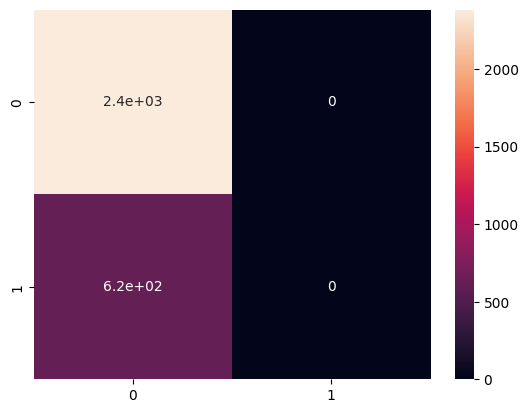

In [42]:
cnma = confusion_matrix(labels= ytest, predictions= yp)
import seaborn as sns
sns.heatmap(cnma, annot=True)